In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df.sample(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2149,10609,1962,PhD,Married,42769.0,0,1,12-10-2013,15,71,...,4,0,0,0,0,0,0,3,11,0
1549,2217,1975,2n Cycle,Married,37284.0,1,1,29-03-2013,46,11,...,6,0,0,0,0,0,0,3,11,0
672,9204,1970,Graduation,Widow,66731.0,0,1,12-09-2012,33,371,...,3,0,0,0,0,0,0,3,11,0
1225,257,1959,PhD,Married,75032.0,0,1,28-04-2013,74,952,...,3,0,0,0,0,0,0,3,11,0


In [4]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue"])

In [5]:
# Handle missing values
df_cleaned = df_cleaned.dropna()

In [6]:
# Encode categorical variables
categorical_cols = ["Education", "Marital_Status"]
label_encoders = {}

In [7]:
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le


In [8]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = df_cleaned.columns.difference(categorical_cols)
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [9]:
# Determine optimal number of clusters (Elbow Method)
wcss = []
K_range = range(2, 10)

In [10]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

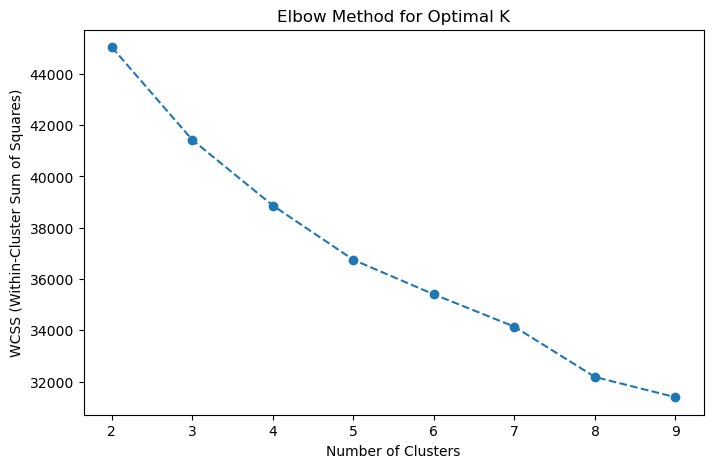

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [12]:
plt.show()

In [13]:
# Apply K-Means Clustering
optimal_k = 4  # Choose based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(df_cleaned)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [14]:
# Compute Silhouette Score
sil_score = silhouette_score(df_cleaned.drop(columns=["Cluster"]), df_cleaned["Cluster"])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.16447637669362905


In [15]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_cleaned.drop(columns=["Cluster"]))
df_cleaned["PCA1"] = pca_data[:, 0]
df_cleaned["PCA2"] = pca_data[:, 1]


In [16]:
# Visualize clusters
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

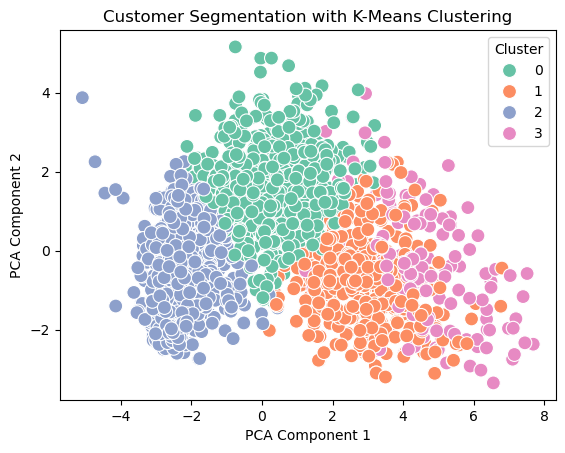

In [17]:
sns.scatterplot(x=df_cleaned["PCA1"], y=df_cleaned["PCA2"], hue=df_cleaned["Cluster"], palette="Set2", s=100)
plt.title("Customer Segmentation with K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()